# Big Data Exercises

In these exercises we will work on data from a series of global weather monitoring stations used to measure climate trends to examine long-term trends in temperature for your home locality. This data comes from the Global Historical Climatology Network, and is the actual raw data provided by NOAA. The only changes I have made to this data are a few small formatting changes to help meet the learning goals of this exercise. 

To do these excercises, first please download the data for this exercise [from here](https://www.dropbox.com/s/oq36w90hm9ltgvc/global_climate_data.zip?dl=0). Note this is a big file (this is a big-data exercise, after all), so be patient. 

**(1)** The data we'll be working with can be found in the file `ghcnd_daily.tar.gz`. It includes daily weather data from thousands of weather stations around the work over many decades. 

Begin by decompressing the file and checking it's size -- it should come out to be *about* 4gb, but will expand to about 12 gb in RAM, which means there's just no way most students (who usually have, at most, 16gb of RAM) can import this dataset into pandas and manipulate it directly. 

(Unsure how to decompress it? Try checking the readme)

(Note: what we're doing can be applied to much bigger datasets, but they sometimes takes hours to work with, so we're working with data that's just a *little* big so we can get exercises done in reasonable time).  

**(2)** Thankfully, we aren't going to be working with *all* the data today. Instead, everyone should pick three weather stations to examine during this analysis. 

To pick your stations, we'll need to open the `ghcnd-stations.txt` file in the directory you've downloaded. It includes both station codes (which is what we'll find in the `ghcnd_daily.csv` data, as well as the name and location of each station). 

When picking a weather station, make sure to pick one flagged as being in either GSN, HCN, or CRN (these designate more formalized stations that have been around a long time, ensuring you'll get a station with data that has been recorded over a longer period). 

Note that Station IDs start with the two-letter code of the country in which they are located, and the "NAME" column often constains city names. 

**The `ghcnd-stations.txt` is a "fixed-width" dataset,** meaning that instead of putting commas or tabs between observations, all columns have the same width (in terms of number of characters). So to import this data you'll have to (a) read the notes about the data in the project README.txt, and (b) read about how to read in fixed-width data in pandas. When entering column specifications, remember that normal people count from 1 and include end points, while Python counts from 0 and doesn't include end points (so if the readme says data is in columns 10-20, in Python that'd be 9 through 20).

**(3)** Now that we something about the observations we want to work with, we can now turn to our actual weather data. 

Our daily weather can be found in `ghcnd_daily.csv`, which you get by unzipping `ghcnd_daily.tar.gz`. Note that the README.txt talks about this being a fixed-width file. Since you've already dealt with one fixed-width file, I've just converted this to a CSV, and dropped all the data that isn't "daily max temperatures". 

Let's start with the fun part. **SAVE YOUR NOTEBOOK AND ANY OTHER OPEN FILES!**. Then just try and import the data (`ghcnd_daily.csv`) while watching your Activity Monitor (Mac) or Resource Monitor (Windows) to see what happens.  

If you have 8GB of RAM, this should fail miserably. 

If you have 16GB of RAM, you might just get away with this. But if it *does* load, try sorting the data by year and see how things go. 

(If you have 32GB of RAM: you're actually probably fine with data this size. Sorry -- datasets big enough to cause big problems for people with 32GB take a long time to chunk on an 8GB computer, and these exercises have to be fast enough to finish in a class period! There are some exercises at the bottom with a REALLY big dataset you can work with.)

You may have to kill your kernel, kill VS Code, and start over when this explodes...

In [1]:
import pandas as pd

#data = pd.read_csv("../global_climate_data/ghcnd_daily.csv")

**(4)** Now that we know that we can't work with this directly, it's good with these big datasets to just import ~200 lines so you can get a feel for the data. So load *just 200 lines* of `ghcnd_daily.csv`.

In [9]:
import pandas as pd

data = pd.read_csv("../global_climate_data/ghcnd_daily.csv", nrows=200)
print(data)

              id  year  month element  value1  mflag1  qflag1 sflag1  value2  \
0    ACW00011604  1949      1    TMAX     289     NaN     NaN      X     289   
1    ACW00011604  1949      2    TMAX     267     NaN     NaN      X     278   
2    ACW00011604  1949      3    TMAX     272     NaN     NaN      X     289   
3    ACW00011604  1949      4    TMAX     278     NaN     NaN      X     283   
4    ACW00011604  1949      5    TMAX     283     NaN     NaN      X     283   
..           ...   ...    ...     ...     ...     ...     ...    ...     ...   
195  AE000041196  1981      9    TMAX   -9999     NaN     NaN    NaN   -9999   
196  AE000041196  1981     10    TMAX   -9999     NaN     NaN    NaN     350   
197  AE000041196  1981     11    TMAX     330     NaN     NaN      I     310   
198  AE000041196  1981     12    TMAX     270     NaN     NaN      I     290   
199  AE000041196  1982      1    TMAX     245     NaN     NaN      I     230   

     mflag2  ...  qflag29 sflag29  valu

**(5)** Once you have a sense of the data, write code to chunk your data: i.e. code that reads in all blocks of the data that will fit in ram, keeps only the observations for the weather stations you've selected to focus on, and throws away everything else.

In addition to your own three weather stations, please also include station USC00050848 (a weather station from near my home!) so you can generate results that we can all compare (to check for accuracy). 

Note you will probably have to play with your chunk sizes (probably while watching your RAM usage?). That's because small chunk sizes, while useful for debugging, are very slow. 

Every time Python processes a chunk, there's a fixed processing cost, so in a dataset with, say, 10,000,000 rows, if you try to do chunks of 100 rows, that fixed processing cost has to be paid 100,000 times. Given that, the larger you can make your chunks the better, so long as your chunks don't use up all your RAM. Again, picking a chunk size then watching your RAM usage is a good way to see how close you are to the limits of your RAM.

In [3]:

stations = ["AE000041196", "AG000060590", "AG000060611", "USC00050848"]
filtered_data = []

# Read the FULL file in chunks
chunk_iterator = pd.read_csv("../global_climate_data/ghcnd_daily.csv", chunksize=100000)

for chunk in chunk_iterator:
    # Keep only rows for our 4 stations
    filtered_chunk = chunk[chunk["id"].isin(stations)]
    filtered_data.append(filtered_chunk)

# Combine all filtered chunks into one DataFrame
chunked_data = pd.concat(filtered_data, ignore_index=True)
print(f"Total rows for our stations: {len(chunked_data)}")
print(chunked_data.head())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38708\531520052.py:7: DtypeWarning: Columns (6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98,102,106,110,114,118,122,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iterator:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38708\531520052.py:7: DtypeWarning: Columns (6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98,102,106,110,114,118,122,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iterator:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38708\531520052.py:7: DtypeWarning: Columns (6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78,82,86,90,94,98,102,106,110,114,118,122,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iterator:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38708\531520052.py:7: DtypeWarning: Columns (6,10,14,18,22,26,30,34,38

Total rows for our stations: 3924
            id  year  month element  value1 mflag1 qflag1 sflag1  value2  \
0  AE000041196  1944      3    TMAX   -9999    NaN    NaN    NaN   -9999   
1  AE000041196  1944      4    TMAX     258    NaN    NaN      I     263   
2  AE000041196  1944      5    TMAX     335    NaN    NaN      I     363   
3  AE000041196  1944      6    TMAX     374    NaN    NaN      I     396   
4  AE000041196  1944      7    TMAX     396    NaN    NaN      I     380   

  mflag2  ... qflag29 sflag29  value30 mflag30 qflag30 sflag30  value31  \
0    NaN  ...     NaN       I      396     NaN     NaN       I      313   
1    NaN  ...     NaN       I      346     NaN     NaN       I    -9999   
2    NaN  ...     NaN       I      385     NaN     NaN       I      352   
3    NaN  ...     NaN       I      435     NaN     NaN       I    -9999   
4    NaN  ...     NaN       I      380     NaN     NaN       I      385   

  mflag31 qflag31 sflag31  
0     NaN     NaN       I  
1 

**(6)** Now, for each weather station, figure out the *earliest* year with data. Keep `USC00050848` and the two of the three weather stations you picked with the best data (i.e., you should have 3 total, two you picked and `USC00050848`).

In [4]:
# Find earliest year for each station
earliest_years = chunked_data.groupby('id')['year'].min()
print("Earliest year for each station:")
print(earliest_years)

# Identify which 2 of your 3 stations have the earliest data
your_stations = ["AE000041196", "AG000060590", "AG000060611"]
your_stations_years = earliest_years[earliest_years.index.isin(your_stations)]
best_two = your_stations_years.nsmallest(2).index.tolist()

# Keep USC00050848 + your best 2
stations_to_keep = ["USC00050848"] + best_two

# Filter data to only these 3 stations
final_data = chunked_data[chunked_data['id'].isin(stations_to_keep)]
print(f"\nKeeping stations: {stations_to_keep}")
print(f"Total rows: {len(final_data)}")

Earliest year for each station:
id
AE000041196    1944
AG000060590    1892
AG000060611    1958
USC00050848    1893
Name: year, dtype: int64

Keeping stations: ['USC00050848', 'AG000060590', 'AE000041196']
Total rows: 3215


**(7)** Now calculate the average max temp for each weather station / month in the data. Note that in a few weeks, we'll have the skills to do this by reshaping our data so each row is a single day, rather than a month. But for the moment, just sum the columns, watching out for weird values. 

To sum across the value columns, we can combine: 

```python
weather_data.filter(like='value')
```

(to just get the columns whose names start with "value") with `.mean(axis='columns')` (which averages across columns (along rows) rather than the usual averaging across rows (along columns). 

In [11]:
import numpy as np

# Get only the value columns (daily temperatures)
temp_values = final_data.filter(like='value')

# Replace -9999 (missing data indicator) with NaN before calculating averages
temp_values = temp_values.replace(-9999, np.nan)

# Calculate average max temp across all days in each month
# Using nanmean behavior: .mean() automatically ignores NaN values
final_data['avg_max_temp'] = temp_values.mean(axis='columns')

# Group by station and month to see the results
monthly_avg = final_data.groupby(['id', 'year', 'month'])['avg_max_temp'].mean()
print(monthly_avg)

# Or create a summary by station
station_summary = final_data.groupby('id')['avg_max_temp'].agg(['mean', 'min', 'max', 'count'])
print("\nSummary by station:")
print(station_summary)

id           year  month
AE000041196  1944  3        323.166667
                   4        321.466667
                   5        348.677419
                   6        393.333333
                   7        390.517241
                               ...    
USC00050848  2019  5        176.483871
                   6        263.700000
                   7        315.967742
                   8        322.689655
                   9        296.958333
Name: avg_max_temp, Length: 3215, dtype: float64

Summary by station:
                   mean         min         max  count
id                                                    
AE000041196  340.554796  210.625000  451.172414    640
AG000060590  295.460625  139.967742  475.000000   1121
USC00050848  180.797544  -19.750000  341.225806   1454


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38708\3455668541.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['avg_max_temp'] = temp_values.mean(axis='columns')


**(6)** Now for each weather station, generate a separate plot of the daily temperatures over time. You should end up with a plot that looks something like this:

![temp_plots_Colorado](images/temp_plots_Boulder_CO.png)

**NOTE:** If your plot has little horizontal lines at the tops and bottoms of the temperature plots connecting perfectly vertical temperature lines, it means you made a mistake in how you plotted your data!

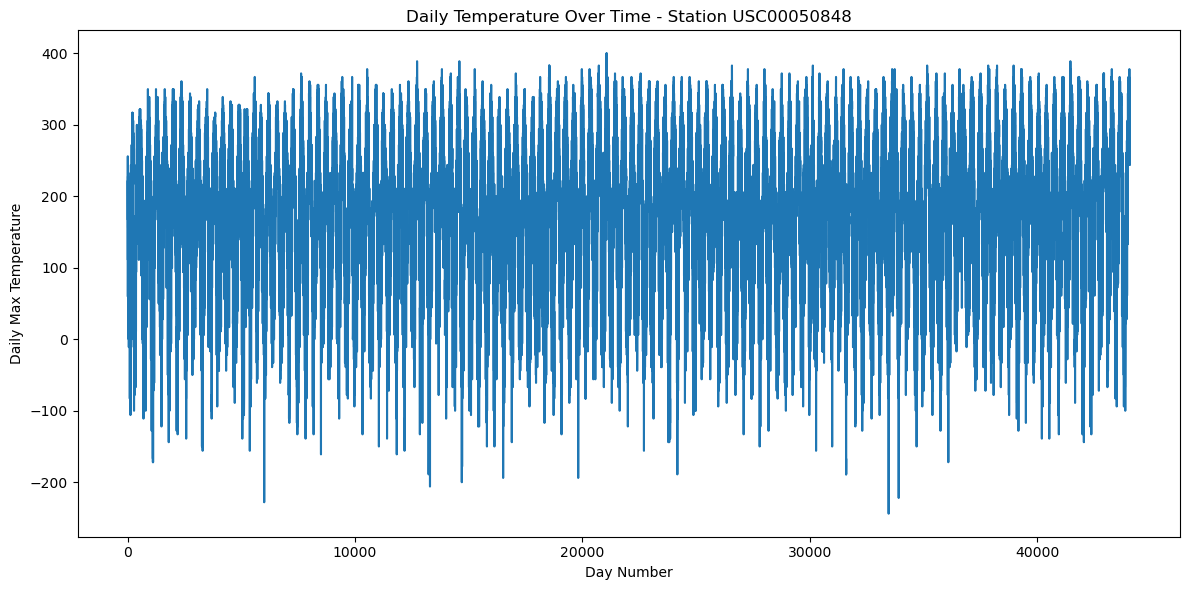

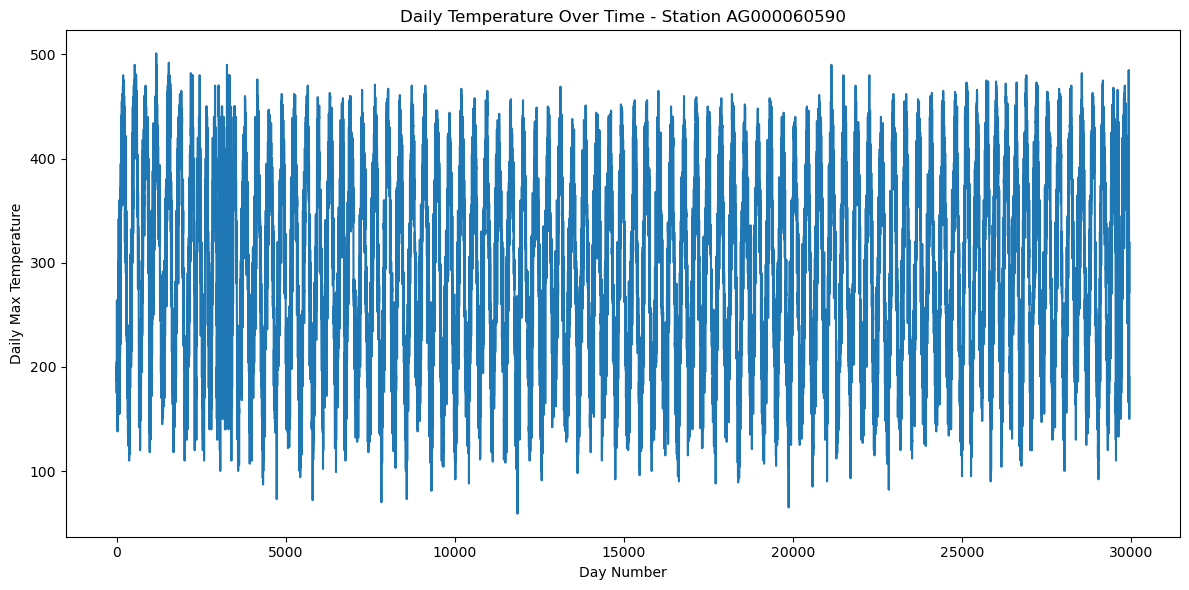

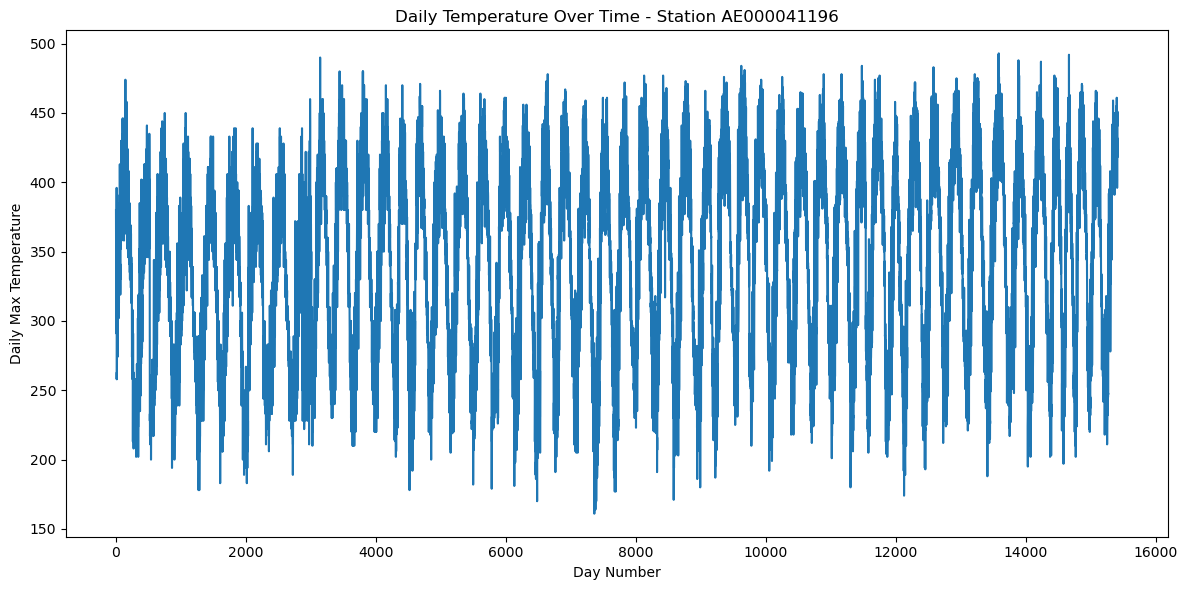

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create a separate plot for each station
for station in stations_to_keep:
    station_data = final_data[final_data['id'] == station].copy()
    
    # Sort by date to ensure proper chronological plotting
    station_data = station_data.sort_values(['year', 'month'])
    
    # Extract all daily temperatures from the value columns
    temp_values = station_data.filter(like='value')
    
    # Replace -9999 (missing data indicator) with NaN
    temp_values = temp_values.replace(-9999, np.nan)
    
    # Flatten all daily temperatures into a single array
    # Each row has up to 31 daily values, we need to extract them all
    all_temps = []
    for idx, row in temp_values.iterrows():
        daily_temps = row.dropna().values  # Remove NaN values (for months with <31 days and missing data)
        all_temps.extend(daily_temps)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(all_temps)), all_temps)
    plt.title(f'Daily Temperature Over Time - Station {station}')
    plt.xlabel('Day Number')
    plt.ylabel('Daily Max Temperature')
    plt.tight_layout()
    plt.show()

## Want More Practice?

If you *really* want a challenge, the file `ghcnd_daily_30gb.tar.gz` will decompress into `ghcnd_daily.dat`, the full version of the GHCND daily data. It contains not only daily high temps, but also daily low temps, preciptionation, etc. Moreover, it is still in fixed-width format, and is about 30gb in raw form. 

Importing and chunking this data (with moderate optimizations) took about 2 hours on my computer. 

If you're up for it, it's a great dataset to wrestling with data in weird formats and chunking. 

**Pro-tip:** strings take up *way* more space in RAM than numbers, so some columns can be converted to keep the memory footprint of the data down. 